In [2]:
#Gerekli kütüphanelerin import edilmesi

#pip install tensorflow

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [3]:
#Veri setini içeri aktarma ve gereken şekilde parçalara ayırma
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("Eğitim Setinin Boyutu :  ", x_train.shape, y_train.shape)

Eğitim Setinin Boyutu :   (60000, 28, 28) (60000,)


In [5]:
print("Test Seti Boyutu: ", x_test.shape,y_test.shape)

Test Seti Boyutu:  (10000, 28, 28) (10000,)


In [6]:
num_labels = len(np.unique(y_train))

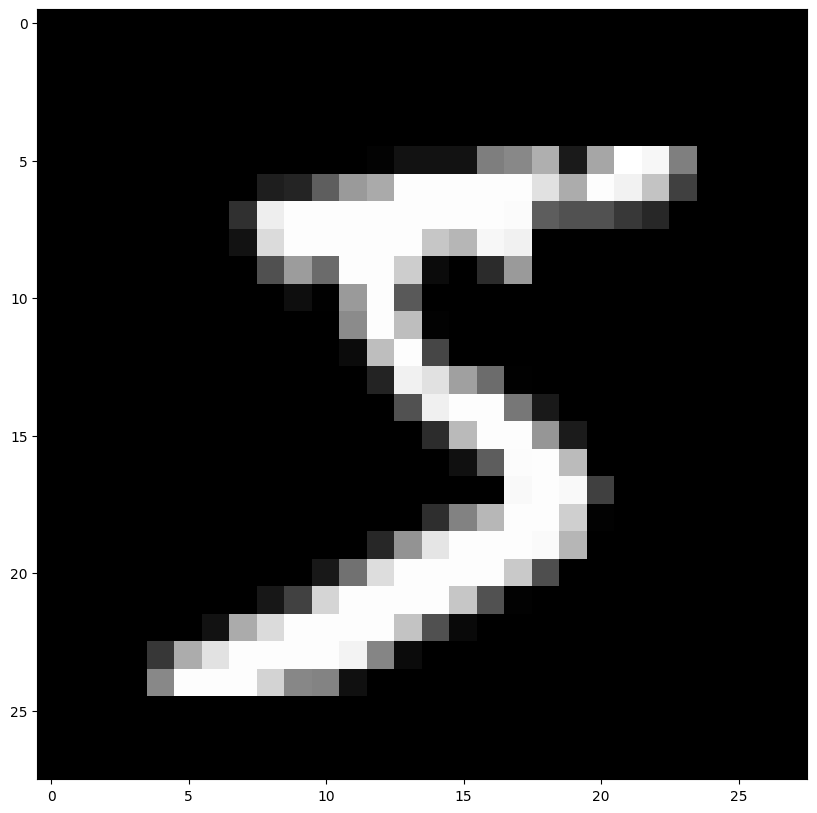

In [7]:
#Veri Setinden Örnekler

plt.figure(figsize=(10,10))
plt.imshow(x_train[0], cmap="gray")

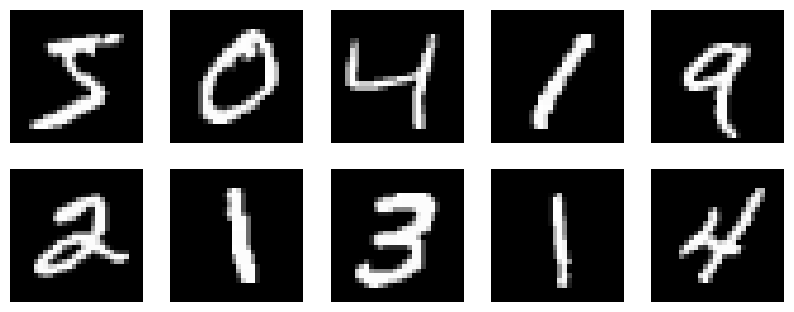

In [8]:
#İlk 10 resmi göster
plt.figure(figsize=(10,10))
for n in range(10):
  ax=plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap='gray')
  plt.axis('off')

In [9]:
#İlk 10 resmi göstermek için oluşturulmuş bir fonksiyon
def visualize_img(data):
  plt.figure(figsize = (10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

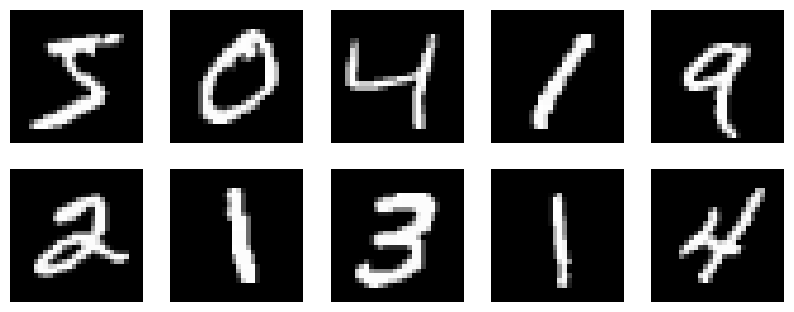

In [10]:
visualize_img(x_train)

In [11]:
#Herhangi bir resmin kaça kaçlık bir pixele sahip olduğunu bulma
x_train[2].shape

(28, 28)

In [12]:
#Herhangi bir resmin pixel sayılarını öğrenme

x_train[2][10,10]

0

In [13]:
x_train[2][14,10]

49

In [14]:
#Bir resmin içerisindeki pixellerin toplamını öğrenme
x_train[2].sum()

19443

In [15]:
#Bir resmin bir bölgesini zoom yapıp o kısım üzerinden işlemler yapma
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [16]:
#Zoom yapılmış bölgenin pixel ortalamasını alma
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [17]:
#Resmin üzerindeki pixellerin değerlerini yazdırmaya yarayan method
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):

        ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                    color='white' if img[x][y]<threshold else 'black')


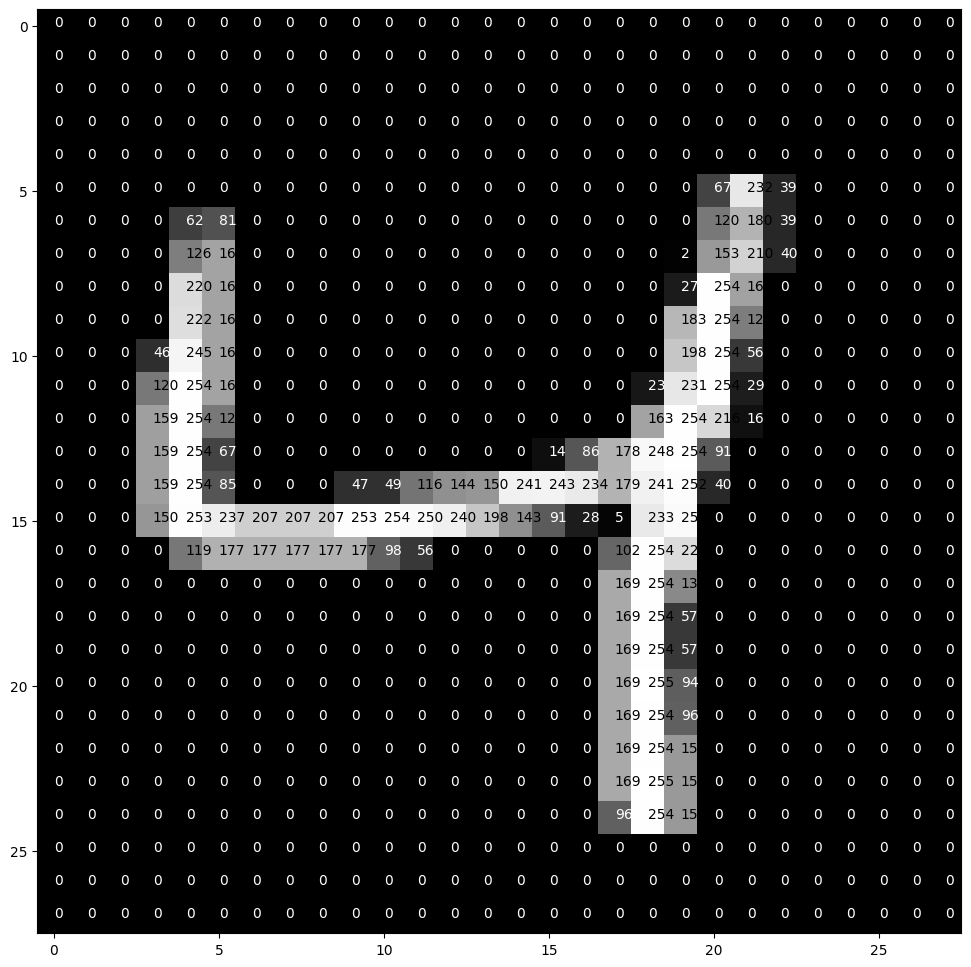

In [18]:
#Yazdırıp görelim
pixel_visualize(x_train[2])

# **Encoding**

In [19]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
#One-hot encoding formatına dönüştürme
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Reshaping

In [22]:
image_size = x_train.shape[1]

In [23]:
image_size

28

In [24]:
#Boyutlara bakalım
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


## Standardization

Standardlaşttırma işlemleri neden yapılır ?

-> Öncelikle veriler çok düşük değerlere dönüştüğünden ötürü eğitim süreci çok hızlı gerçekleşir.

-> Öğrenim sürecini daha sağlıklı bir duruma getirir.

In [26]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
#En mantıklı standartlaştırma işlemi 255 ile bölmektir çünkü en yüksek değer 255 olduğundan 0-1 aralığına getirilmesi gerekiyor.

In [27]:
#Modelimizi oluşturalım.
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)), # Giriş katmanı
    Dense(units=128,activation='relu',name='layer1'), # Gizli katmanda genellikle relu kullanılmasının sebebi sömürme işlemlerinde kullanılabilmesi
    Dense(units=num_labels, activation= 'softmax',name='output_layer')
                          ])

model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       "accuracy"]
              )

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = model.fit(x_train,y_train, epochs=10, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0114 - precision: 0.9981 - recall: 0.9975 - accuracy: 0.9979 - val_loss: 0.0749 - val_precision: 0.9794 - val_recall: 0.9771 - val_accuracy: 0.9779
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0096 - precision: 0.9984 - recall: 0.9980 - accuracy: 0.9983 - val_loss: 0.0756 - val_precision: 0.9798 - val_recall: 0.9776 - val_accuracy: 0.9781
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0084 - precision: 0.9985 - recall: 0.9981 - accuracy: 0.9983 - val_loss: 0.0820 - val_precision: 0.9788 - val_recall: 0.9765 - val_accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0081 - precision: 0.9986 - recall: 0.9983 - accuracy: 0.9984 - val_loss: 0.0758 - val_precision: 0.9798 - val_recall: 0.9778 - val_accuracy: 0.9784
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0054 - precision: 0.9994 - 

In [32]:
################################
# Accuracy ve Loss Grafikleri
################################

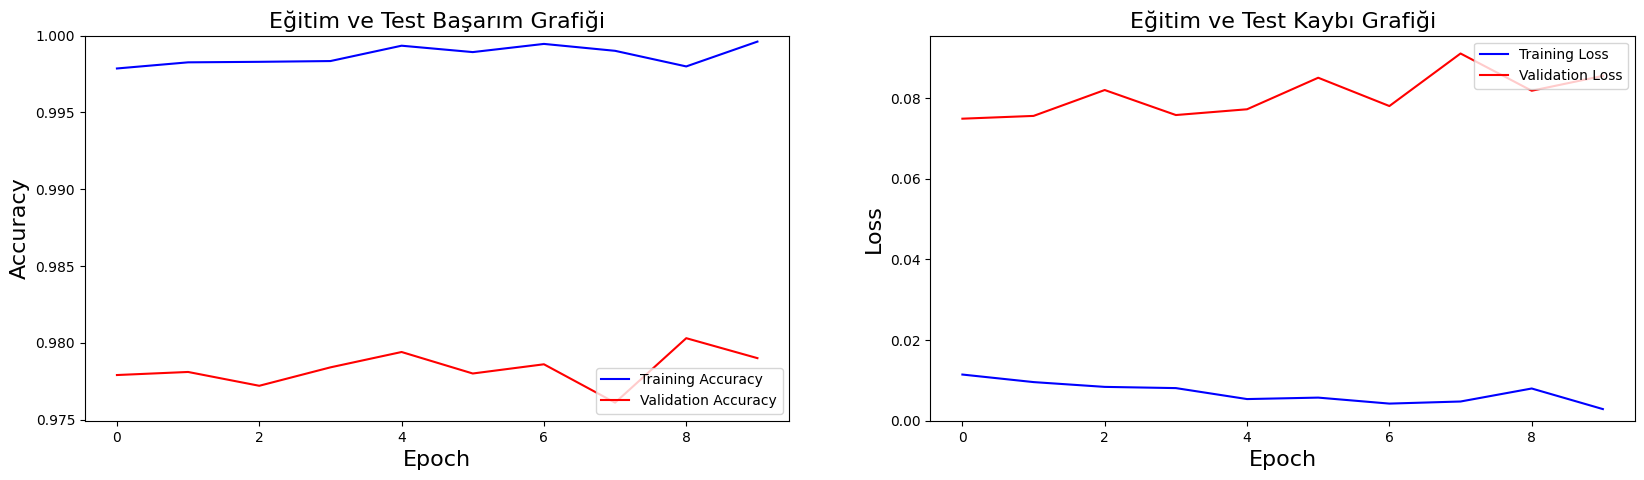

In [41]:
import matplotlib.pyplot as plt

#-------------------------Accuracy Grafiği--------------------------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize= 16)
plt.ylabel('Accuracy', fontsize= 16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)

#---------------------------Loss Grafiği---------------------------------------

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize= 16)
plt.ylabel('Loss', fontsize= 16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim ve Test Kaybı Grafiği', fontsize= 16)
plt.show()

In [42]:
#Karşılaştırma yapılması
loss, precision, recall, acc=model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 *loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.9%

Test Loss: 8.5%

Test Precision: 98.0%

Test Recall: 97.9%


In [43]:
model.save('mnist_model.h5')

In [44]:
import random

random = random.randint(0, x_test.shape[0])

In [45]:
random

8330

In [47]:
test_image= x_test[random]

In [48]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

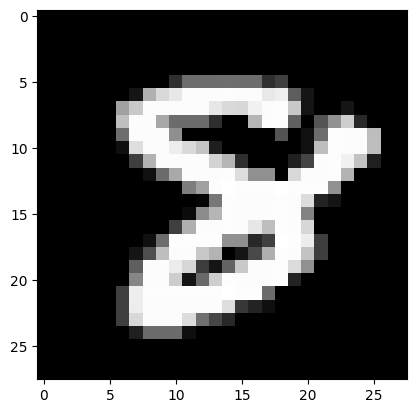

In [49]:
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [50]:
test_data = x_test[random].reshape(1,28,28,1)

In [51]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 85ms/step


In [52]:
probability

array([[1.22771437e-11, 2.21061263e-15, 1.01727345e-07, 4.12434843e-11,
        1.96262379e-14, 2.77135598e-07, 2.16452854e-12, 3.49145235e-12,
        9.99999642e-01, 2.41774245e-09]], dtype=float32)

In [53]:
predicted_classes = np.argmax(probability)

In [54]:
predicted_classes

8

In [55]:
print(f"Tahmin Edilen Sınıf: {predicted_classes}\n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]}\n")
print(f"Diğer Sınıfların Olasılık Değerleri: \n {probability}")

Tahmin Edilen Sınıf: 8

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9999996423721313

Diğer Sınıfların Olasılık Değerleri: 
 [[1.22771437e-11 2.21061263e-15 1.01727345e-07 4.12434843e-11
  1.96262379e-14 2.77135598e-07 2.16452854e-12 3.49145235e-12
  9.99999642e-01 2.41774245e-09]]
